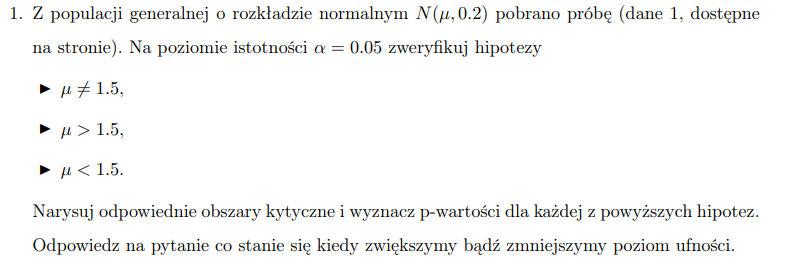

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("moments")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

In [ ]:
dane <- read.delim("dane_zad1.txt", dec=".", header = FALSE)
str(dane)
dane <- dane$V1

'data.frame':	1000 obs. of  1 variable:
 $ V1: num  1.62 1.52 1.18 1.76 1.33 ...


In [ ]:
h0 <- 1.5
alfa <- 0.05
sigma <- 0.2

In [ ]:
Z <- (mean(dane) - h0)/(sigma/sqrt(length(dane)))
Z

[1] -7.041451

In [ ]:
lewy_kwantyl <- -1*qnorm(1-alfa/2, 0, 1)
prawy_kwantyl <- -1*lewy_kwantyl

In [ ]:
lewy_kwantyl
prawy_kwantyl

[1] -1.959964

[1] 1.959964

In [ ]:
1-alfa/2
1-(1-alfa/2)

[1] 0.975

[1] 0.025

In [ ]:

x1 <- seq(-8,8,0.1) #do gestosci N(0,1)
x2 <- seq(-8, lewy_kwantyl, 0.01)
x3 <- seq(prawy_kwantyl, 8, 0.01)

In [ ]:
normalDistribution <- data.frame(
    x = seq(-8,8, by = 0.01),
    y = dnorm(seq(-8,8, by = 0.01))
)

In [ ]:
criticalValues <- qnorm(c(.025,.975))
criticalValues
cr <- qnorm(c(1-alfa/2, 1-(1-alfa/2)))
cr
shadeNormalTwoTailedLeft <- rbind(c(criticalValues[1],0), subset(normalDistribution, x < criticalValues[1]))

shadeNormalTwoTailedRight <- rbind(c(criticalValues[2],0), subset(normalDistribution, x > criticalValues[2]), c(3,0))

[1] -1.959964  1.959964

[1]  1.959964 -1.959964

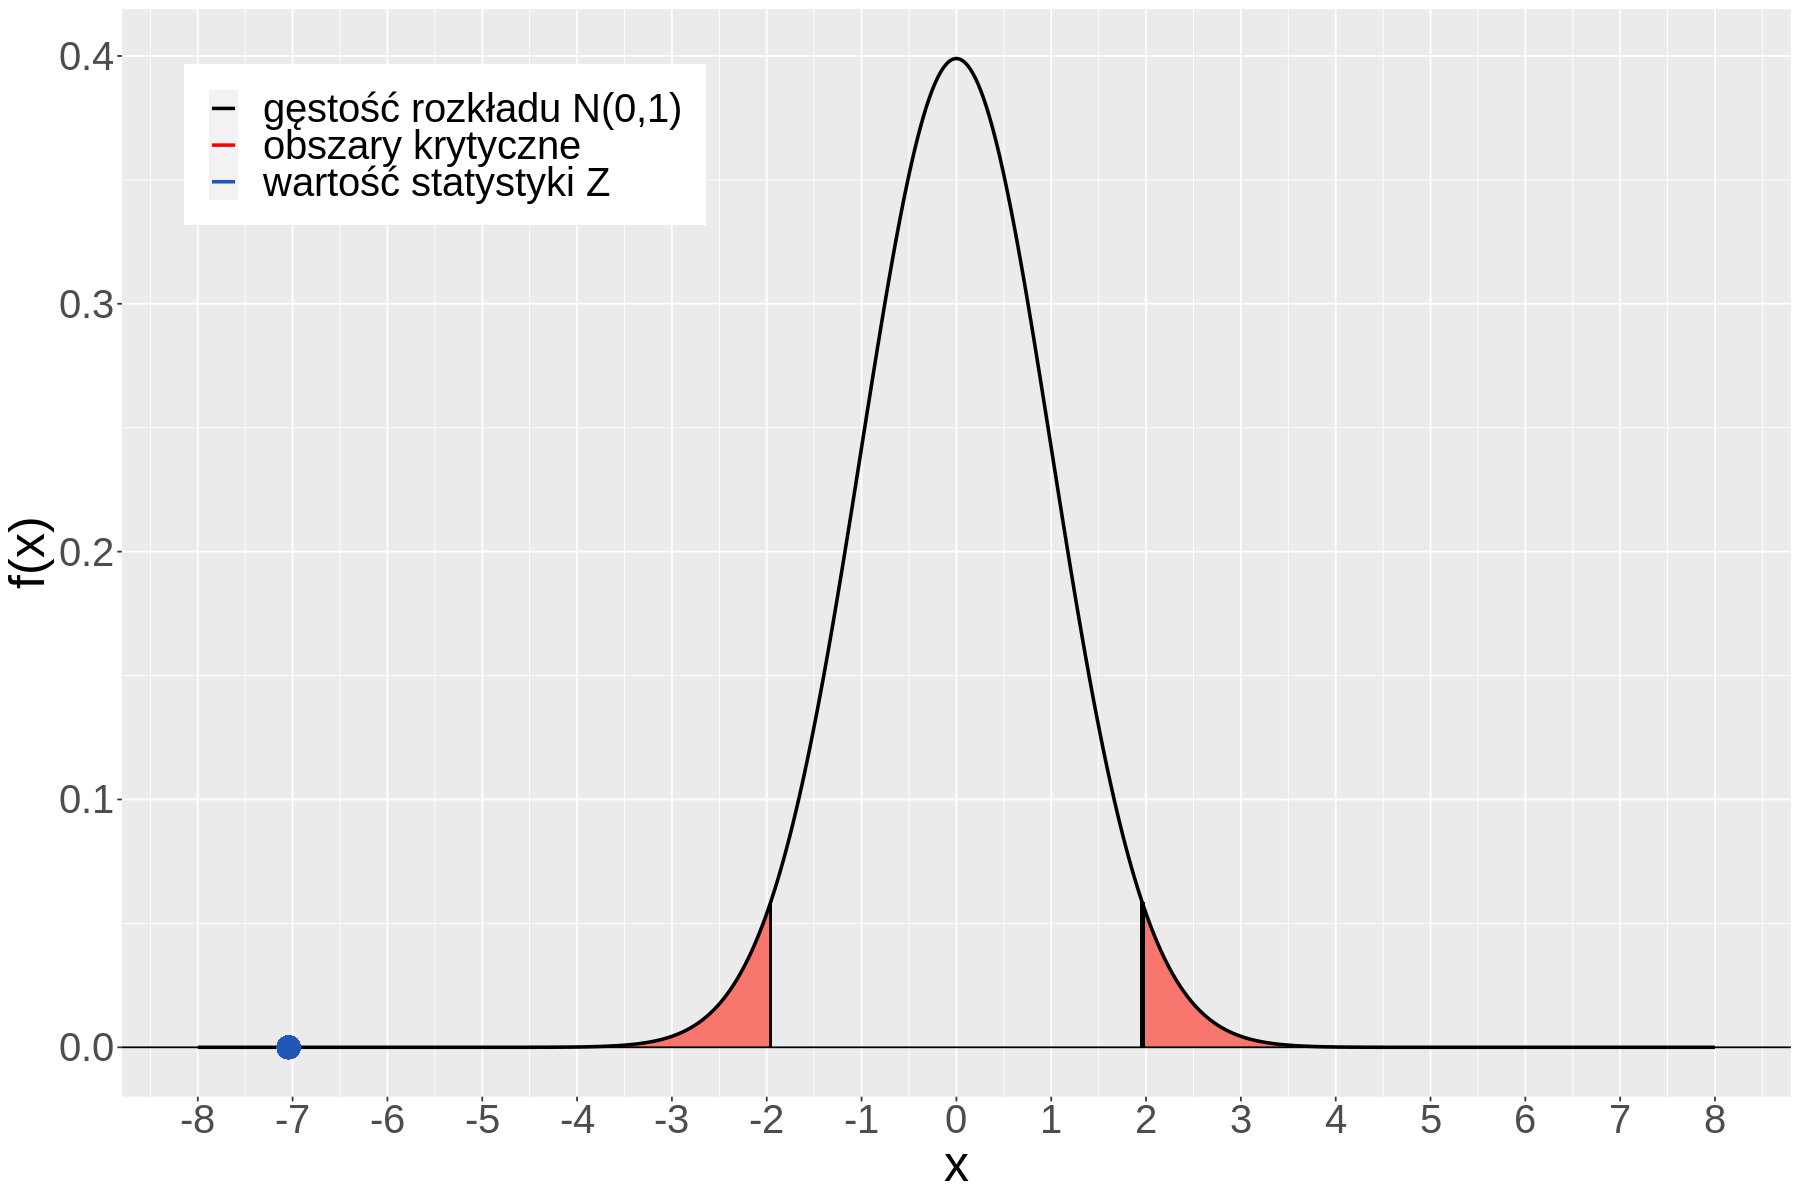

In [ ]:
options(repr.plot.width = 15, repr.plot.height =10)
colors <- c("gęstość rozkładu N(0,1)" = 'black', 'obszary krytyczne'='red', 'wartość statystyki Z'= '#2257B8')
ggplot(normalDistribution, aes(x,y)) +
    geom_polygon(data = shadeNormalTwoTailedLeft, aes(x=x, y=y, fill="red")) +
    geom_polygon(data = shadeNormalTwoTailedRight, aes(x=x, y=y, fill="red")) +
    geom_line(aes(colour ='gęstość rozkładu N(0,1)'), size=1) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = criticalValues[1], y = 0, xend = criticalValues[1], yend = dnorm(criticalValues[1])),  size=0.8) +
    geom_segment(aes(x = criticalValues[2], y = 0, xend = criticalValues[2], yend = dnorm(criticalValues[2])), size=1.2) +
    scale_y_continuous(breaks=seq(0,0.4,0.1)) +
    scale_x_continuous(breaks=seq(-8,8,1)) +
    geom_point(aes(x=Z,y=0), col='#2257B8', size=6) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=30, family="Arial")) +
    theme(
    legend.position = c(.35, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(1, 15,15, 15)) +
    scale_color_manual(name=NULL, values = colors)


In [ ]:
p_value_a <- 2 - 2*pnorm(abs(Z),0, 1)
p_value_a

[1] 1.902478e-12

In [ ]:
kwantyl <- qnorm(1-alfa, 0, 1)
kwantyl

[1] 1.644854

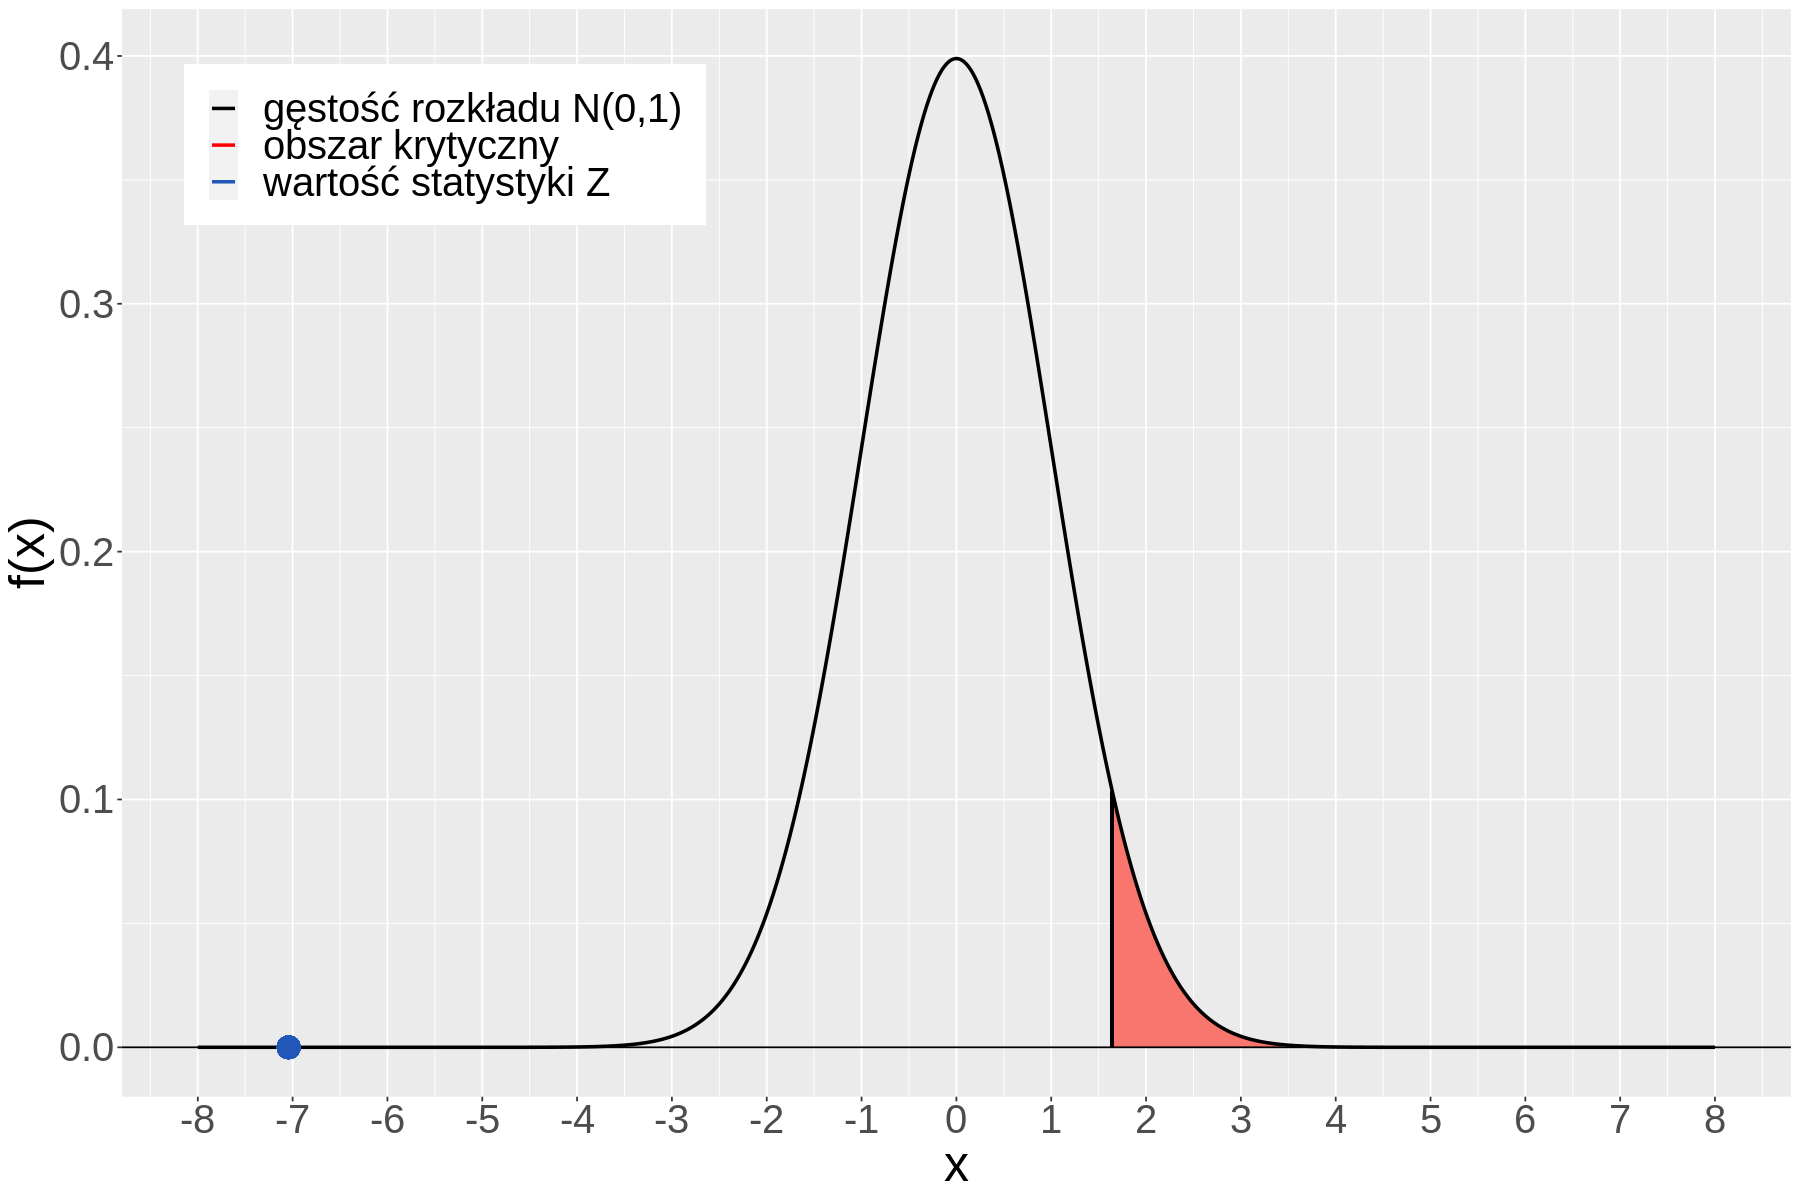

In [ ]:
criticalValue <- qnorm(1-alfa)

shadeNormal <- rbind(c(criticalValue,0), subset(normalDistribution, x > criticalValue), c(3,0))
colors <- c("gęstość rozkładu N(0,1)" = 'black', 'obszar krytyczny'='red', 'wartość statystyki Z'= '#2257B8')
ggplot(normalDistribution, aes(x,y)) +
    geom_polygon(data = shadeNormal, aes(x=x, y=y, fill="red")) +
    geom_line(size=1, aes(colour ='gęstość rozkładu N(0,1)')) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = criticalValue, y = 0, xend = criticalValue, yend = dnorm(criticalValue)), size=0.9) +
    scale_y_continuous(breaks=seq(0,0.4,0.1)) +
    scale_x_continuous(breaks=seq(-8,8,1)) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=30, family="Arial")) +
    theme(
    legend.position = c(.35, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(1, 15,15, 15)) +
    scale_color_manual(name=NULL, values = colors) +
    geom_point(aes(x=Z,y=0), col='#2257B8', size=6)


In [ ]:
p_value_b = 1-pnorm(Z, 0, 1)
p_value_b

[1] 1

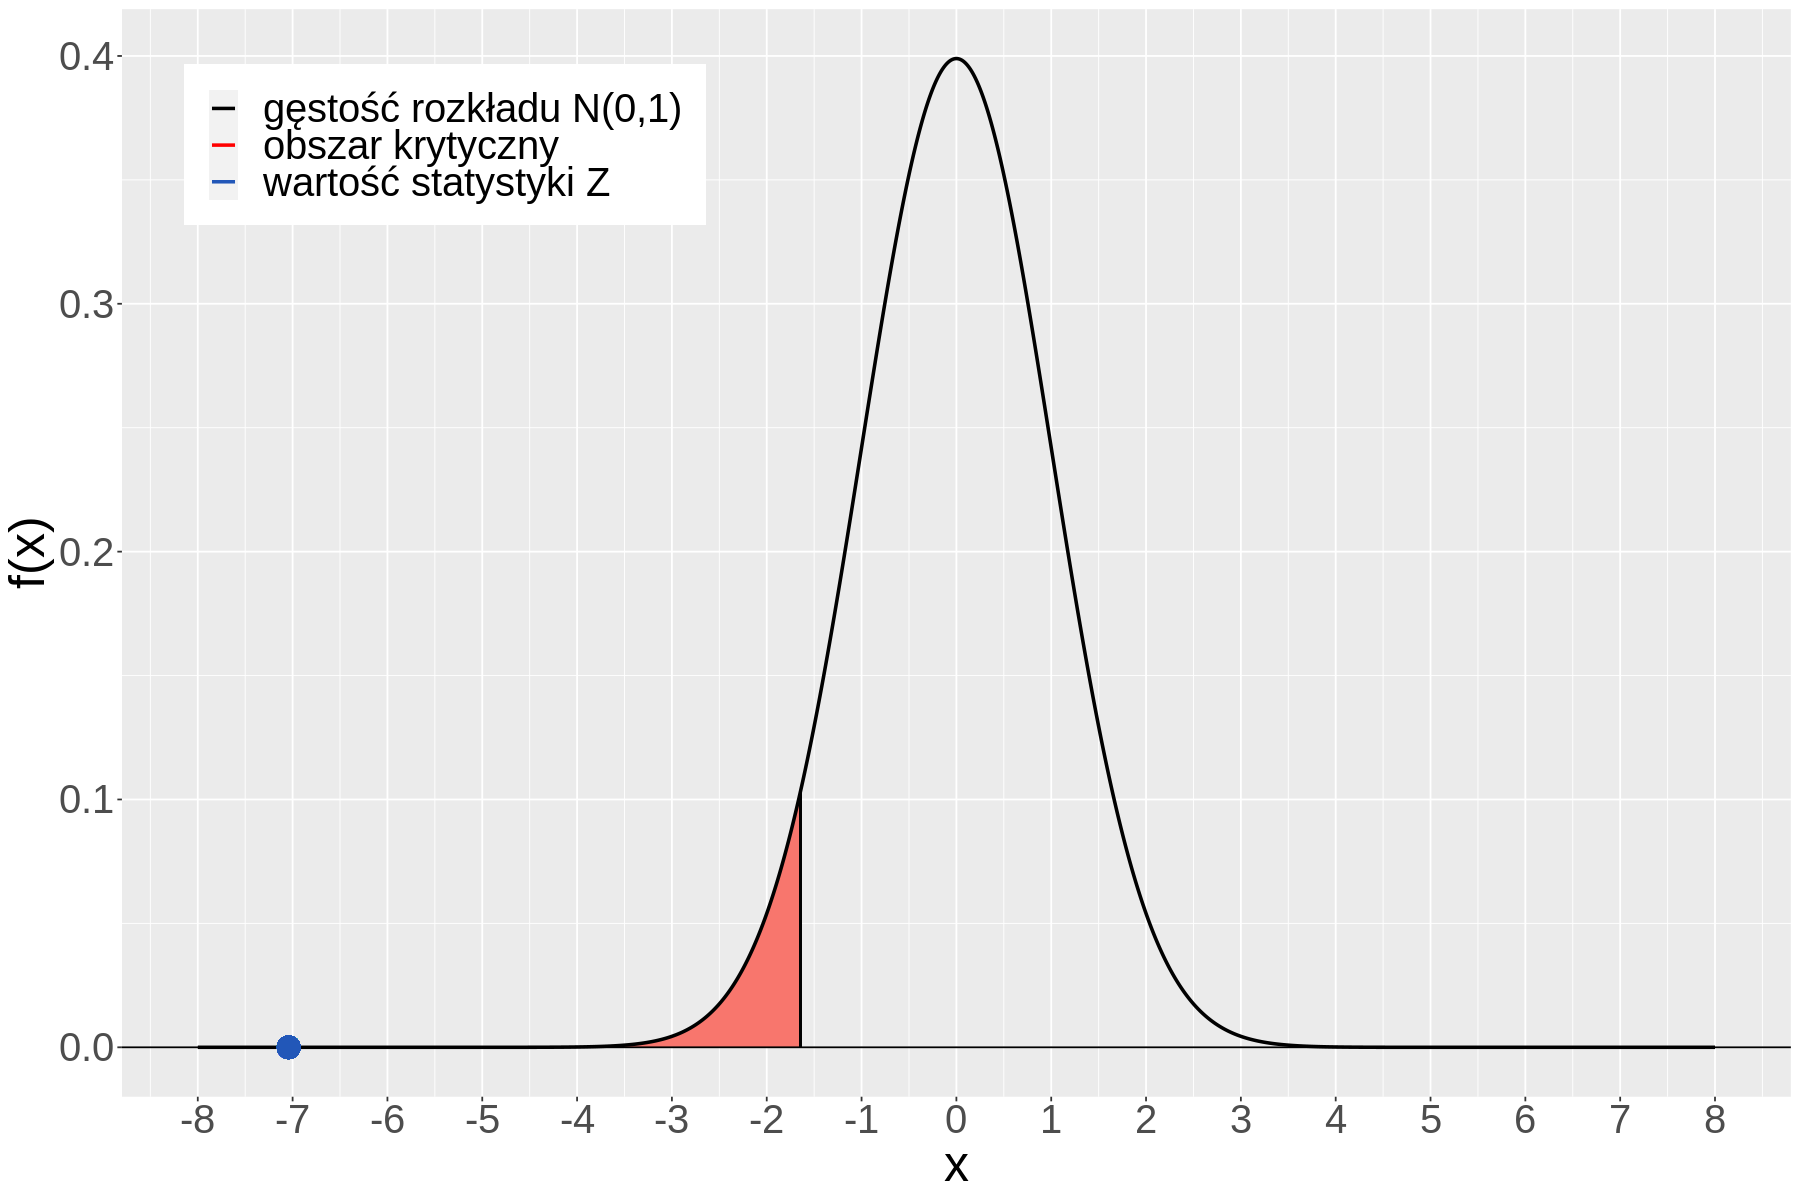

In [ ]:
criticalValue <- -qnorm(1-alfa)

shadeNormal <- rbind(c(criticalValue,0), subset(normalDistribution, x < criticalValue))
colors <- c("gęstość rozkładu N(0,1)" = 'black', 'obszar krytyczny'='red', 'wartość statystyki Z'= '#2257B8')
ggplot(normalDistribution, aes(x,y)) +
    geom_polygon(data = shadeNormal, aes(x=x, y=y, fill="red")) +
    geom_line(size=1, aes(colour ='gęstość rozkładu N(0,1)')) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = criticalValue, y = 0, xend = criticalValue, yend = dnorm(criticalValue)), size=0.5)  +
    scale_y_continuous(breaks=seq(0,0.4,0.1)) +
    scale_x_continuous(breaks=seq(-8,8,1)) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=30, family="Arial")) +
    theme(
    legend.position = c(.35, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(1, 15,15, 15)) +
    scale_color_manual(name=NULL, values = colors) +
    geom_point(aes(x=Z,y=0), col='#2257B8', size=6)

In [ ]:
p_value_c = pnorm(Z, 0, 1)
p_value_c

[1] 9.512413e-13

Dla innego poziomu ufnosci

In [ ]:
h0 <- 1.5
alfa <- 0.1
sigma <- 0.2
Z <- (mean(dane) - h0)/(sigma/sqrt(length(dane)))

In [ ]:
normalDistribution <- data.frame(
    x = seq(-8,8, by = 0.01),
    y = dnorm(seq(-8,8, by = 0.01))
)

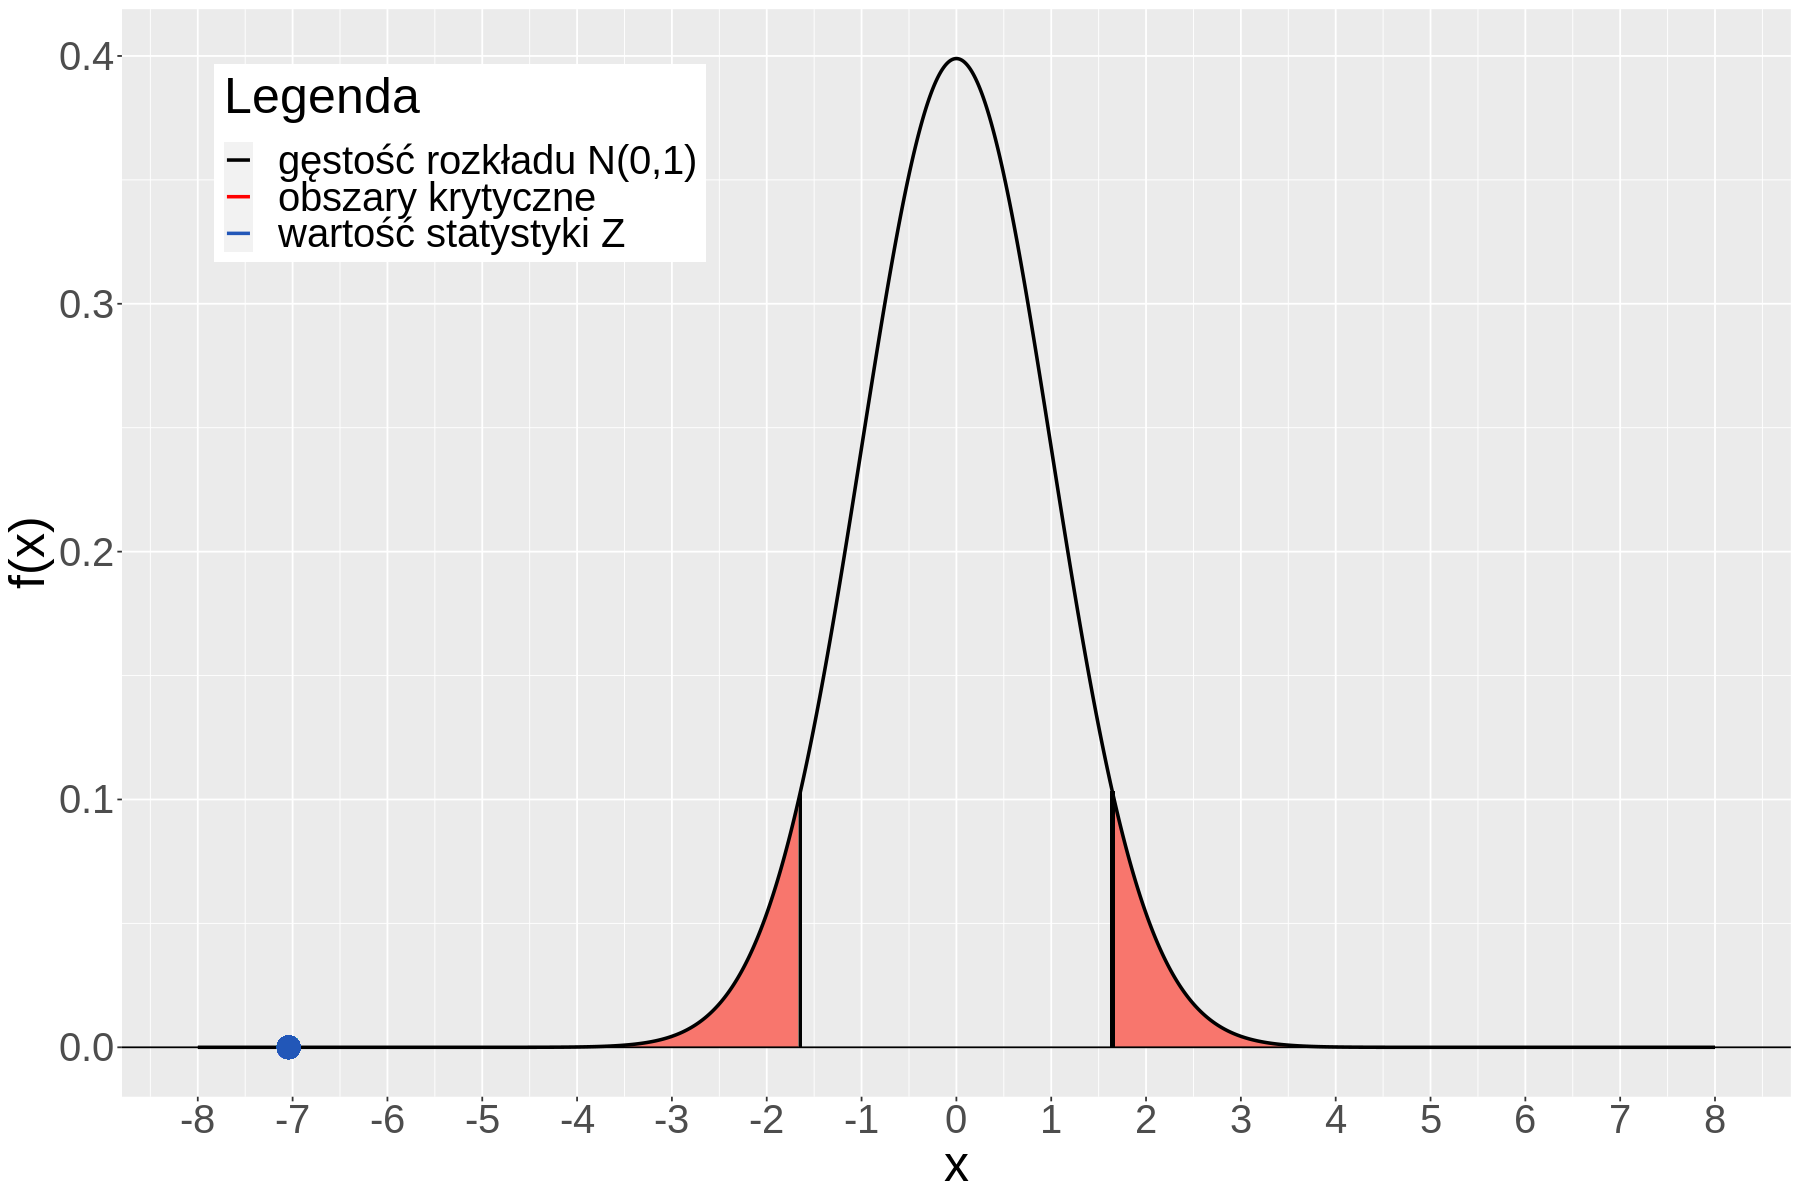

In [ ]:
criticalValues <- qnorm(c(1-(1-alfa/2), 1-alfa/2))
shadeNormalTwoTailedLeft <- rbind(c(criticalValues[1],0), subset(normalDistribution, x < criticalValues[1]))

shadeNormalTwoTailedRight <- rbind(c(criticalValues[2],0), subset(normalDistribution, x > criticalValues[2]), c(3,0))
options(repr.plot.width = 15, repr.plot.height =10)
colors <- c("gęstość rozkładu N(0,1)" = 'black', 'obszary krytyczne'='red', 'wartość statystyki Z'= '#2257B8')
ggplot(normalDistribution, aes(x,y)) +
    geom_polygon(data = shadeNormalTwoTailedLeft, aes(x=x, y=y, fill="red")) +
    geom_polygon(data = shadeNormalTwoTailedRight, aes(x=x, y=y, fill="red")) +
    geom_line(aes(colour ='gęstość rozkładu N(0,1)'), size=1) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = criticalValues[1], y = 0, xend = criticalValues[1], yend = dnorm(criticalValues[1])),  size=0.8) +
    geom_segment(aes(x = criticalValues[2], y = 0, xend = criticalValues[2], yend = dnorm(criticalValues[2])), size=1.2) +
    scale_y_continuous(breaks=seq(0,0.4,0.1)) +
    scale_x_continuous(breaks=seq(-8,8,1)) +
    geom_point(aes(x=Z,y=0), col='#2257B8', size=6) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=30, family="Arial")) +
    theme(
    legend.position = c(.35, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)) +
    scale_color_manual(name="Legenda", values = colors)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry testu
hypothesized_mean = 1.5
population_std = 0.2
sample_size = 100

# Obliczanie granic obszarów krytycznych
alpha = 0.05
ctitical_value_left_tailed = norm.ppf(1 - alpha/2)
critical_value_right_tailed = norm.ppf(1 - alpha)

# Tworzenie siatki wartości Z
z_values = np.linspace(-4, 4, 1000)

# Obliczanie wartości gęstości rozkładu normalnego
pdf = norm.pdf(z_values, 0, 1)

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 6))

# Wykres gęstości rozkładu normalnego
ax.plot(z_values, pdf, 'b-', label='N(0, 1)')

# Obszar krytyczny dla hipotezy dwustronnej
ax.axvline(x=-ctitical_value_left_tailed, color='r', linestyle='--')
ax.axvline(x=ctitical_value_left_tailed, color='r', linestyle='--')
ax.fill_between(z_values, 0, pdf, where=(z_values <= -ctitical_value_left_tailed) | (z_values >= ctitical_value_left_tailed), color='red', alpha=0.2, label='Obszar krytyczny (dwustronnie)')

# Obszar krytyczny dla hipotezy jednostronnej (prawostronnej)
ax.axvline(x=critical_value_right_tailed, color='g', linestyle='--')
ax.fill_between(z_values, 0, pdf, where=(z_values >= critical_value_right_tailed), color='green', alpha=0.2, label='Obszar krytyczny (jednostronnie >)')

# Obszar krytyczny dla hipotezy jednostronnej (lewostronnej)
ax.axvline(x=-critical_value_right_tailed, color='purple', linestyle='--')
ax.fill_between(z_values, 0, pdf, where=(z_values <= -critical_value_right_tailed), color='purple', alpha=0.2, label='Obszar krytyczny (jednostronnie <)')

# Legenda i etykiety osi
ax.legend(loc='best')
ax.set_xlabel('Wartość statystyki testowej Z')
ax.set_ylabel('Gęstość')

# Tytuł wykresu
plt.title('Obszary krytyczne i rozkład normalny')

# Wyświetlanie wykresu
plt.show()

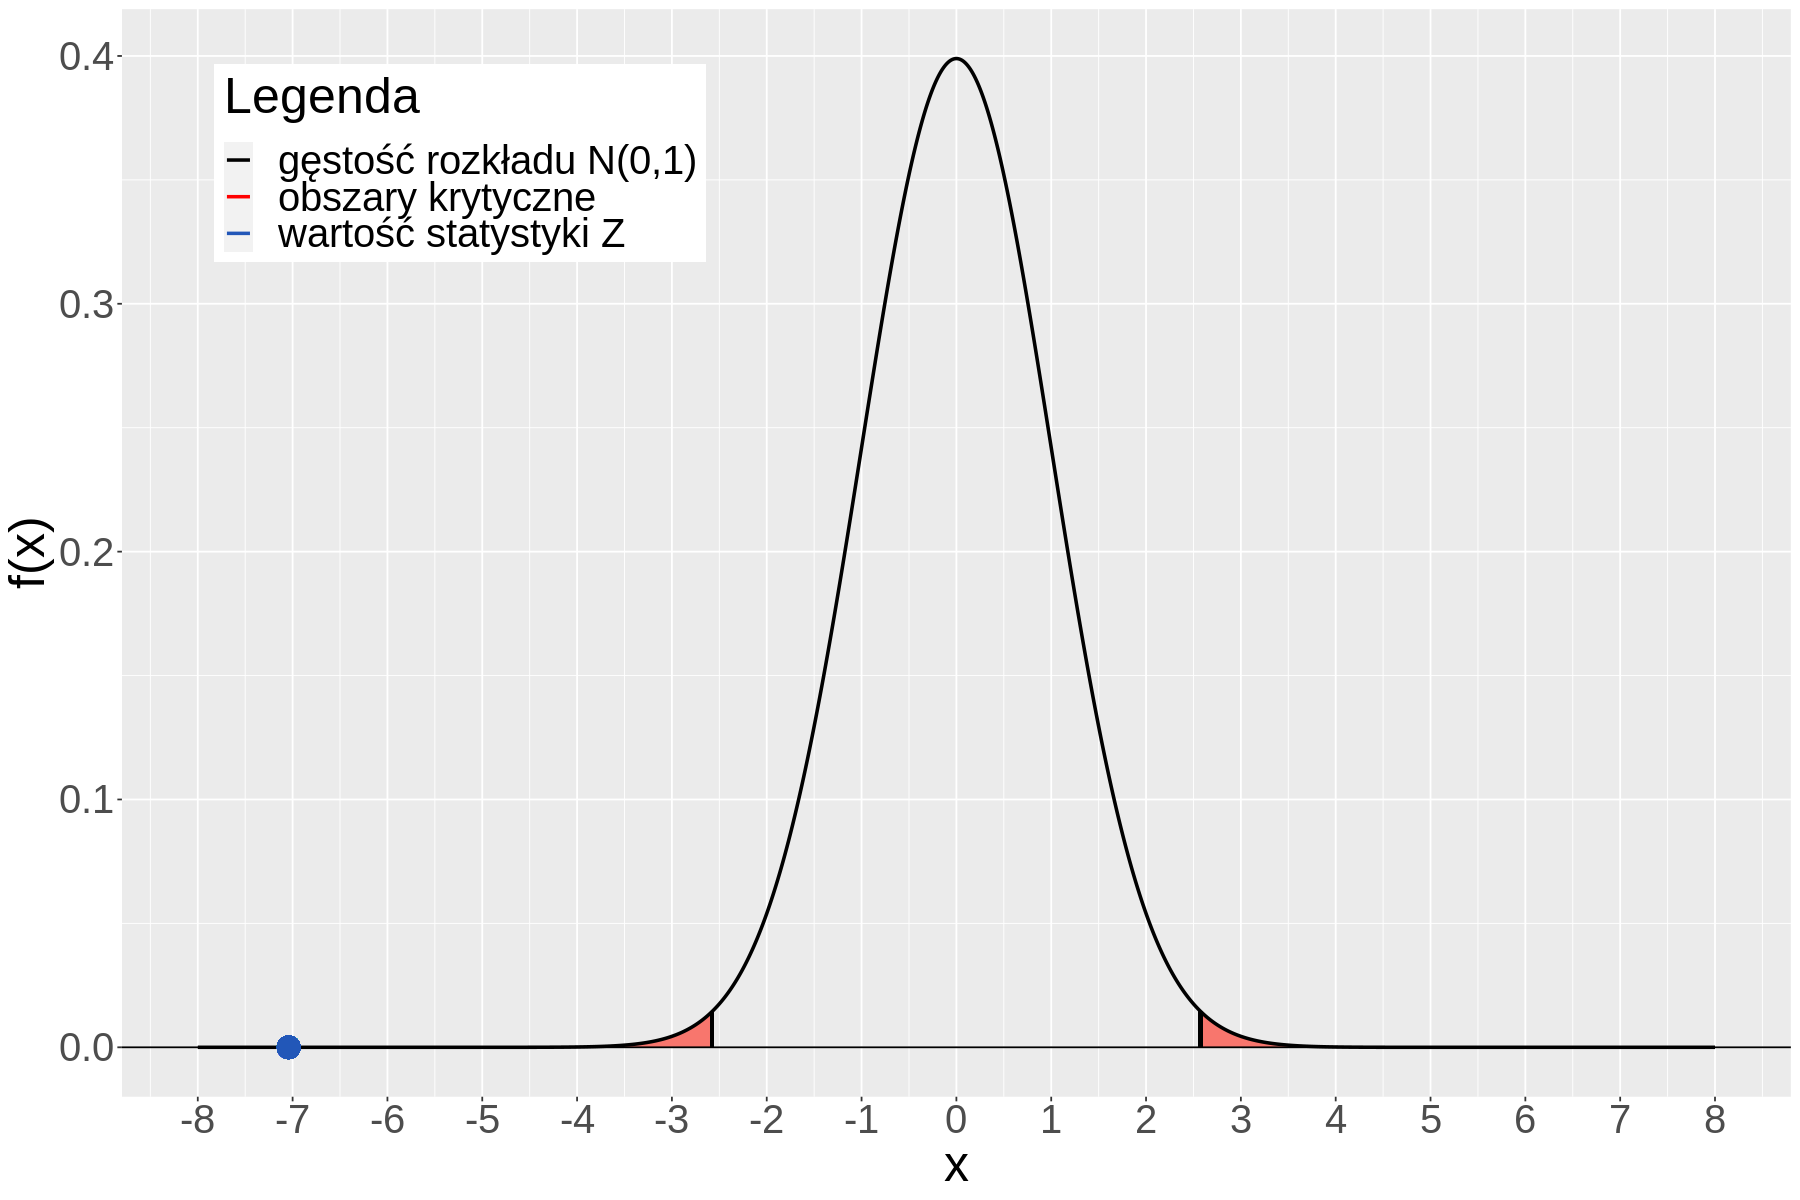

In [ ]:
h0 <- 1.5
alfa <- 0.01
sigma <- 0.2
Z <- (mean(dane) - h0)/(sigma/sqrt(length(dane)))
normalDistribution <- data.frame(
    x = seq(-8,8, by = 0.01),
    y = dnorm(seq(-8,8, by = 0.01))
)
criticalValues <- qnorm(c(1-(1-alfa/2), 1-alfa/2))
shadeNormalTwoTailedLeft <- rbind(c(criticalValues[1],0), subset(normalDistribution, x < criticalValues[1]))

shadeNormalTwoTailedRight <- rbind(c(criticalValues[2],0), subset(normalDistribution, x > criticalValues[2]), c(3,0))
options(repr.plot.width = 15, repr.plot.height =10)
colors <- c("gęstość rozkładu N(0,1)" = 'black', 'obszary krytyczne'='red', 'wartość statystyki Z'= '#2257B8')
ggplot(normalDistribution, aes(x,y)) +
    geom_polygon(data = shadeNormalTwoTailedLeft, aes(x=x, y=y, fill="red")) +
    geom_polygon(data = shadeNormalTwoTailedRight, aes(x=x, y=y, fill="red")) +
    geom_line(aes(colour ='gęstość rozkładu N(0,1)'), size=1) +
    guides(fill="none") +
    geom_hline(yintercept = 0) +
    geom_segment(aes(x = criticalValues[1], y = 0, xend = criticalValues[1], yend = dnorm(criticalValues[1])),  size=0.8) +
    geom_segment(aes(x = criticalValues[2], y = 0, xend = criticalValues[2], yend = dnorm(criticalValues[2])), size=1.2) +
    scale_y_continuous(breaks=seq(0,0.4,0.1)) +
    scale_x_continuous(breaks=seq(-8,8,1)) +
    geom_point(aes(x=Z,y=0), col='#2257B8', size=6) +
    labs(x="x", y="f(x)") +
    theme(text = element_text(size=30, family="Arial")) +
    theme(
    legend.position = c(.35, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)) +
    scale_color_manual(name="Legenda", values = colors)

ZADANIE 3

In [ ]:
mi <- 1.5
sigma <- 0.2
N = 1000

In [ ]:
alfa = 0.02

In [ ]:
#dla mi != 1.5
x <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Z <- (mean(X) - mi)/(sigma/sqrt(length(X)))
  lewy_kwantyl <- -qnorm(1-alfa/2, 0, 1)
  prawy_kwantyl <- -lewy_kwantyl
  if (Z < lewy_kwantyl){
    x <- x + 1
  }
  else if (Z > prawy_kwantyl){
    x <- x+1
  }
}
blad_pierwszego_rodzaju_a <- x/N
blad_pierwszego_rodzaju_a

[1] 0.022

In [ ]:
#dla mi > 1.5
x <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Z <- (mean(X) - mi)/(sigma/sqrt(length(X)))
  kwantyl <- qnorm(1-alfa, 0, 1)
  if (Z > kwantyl){
    x <- x + 1
  }
}
blad_pierwszego_rodzaju_b <- x/N
blad_pierwszego_rodzaju_b

[1] 0.021

In [ ]:
#dla mi < 1.5
x <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Z <- (mean(X) - mi)/(sigma/sqrt(length(X)))
  kwantyl <- -qnorm(1-alfa, 0, 1)
  if (Z < kwantyl){
    x <- x + 1
  }
}
blad_pierwszego_rodzaju_c <- x/N
blad_pierwszego_rodzaju_c

[1] 0.02

II rodzaju

In [ ]:
sigma <- 0.2
N <- 1000
alfa <- 0.055

In [ ]:
bl_2_rodzaju_a <- function(mi){
  y <- 0
  for (i in 1:N){
    X <- rnorm(1000, mi, sigma)
    Z <- (mean(X) -1.5)/(sigma/sqrt(length(X)))
    lewy_kwantyl <- -qnorm(1-alfa/2, 0, 1)
    prawy_kwantyl <- -lewy_kwantyl
    if (Z > lewy_kwantyl & Z < prawy_kwantyl){
      y <- y + 1
  }
  }
  return(y/1000)
}

In [ ]:
bl_2_rodzaju(1.47)
bl_2_rodzaju(1.48)
bl_2_rodzaju(1.49)
bl_2_rodzaju(1.51)
bl_2_rodzaju(1.52)
bl_2_rodzaju(1.53)

[1] 0.003

[1] 0.11

[1] 0.61

[1] 0.614

[1] 0.104

[1] 0.003

In [ ]:
bl_2_rodzaju_b <- function(mi){
    #dla mi > 1.5
y <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Z <- (mean(X) - 1.5)/(sigma/sqrt(length(X)))
  kwantyl <- qnorm(1-alfa, 0, 1)
  if (Z < kwantyl){
    y <- y + 1
  }
  
}
return(y/1000)
}


In [ ]:
bl_2_rodzaju_b(1.51)
bl_2_rodzaju_b(1.52)
bl_2_rodzaju_b(1.53)

[1] 0.512

[1] 0.049

[1] 0

In [ ]:
bl_2_rodzaju_c <- function(mi){
  #dla mi < 1.5
y <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Z <- (mean(X) -1.5)/(sigma/sqrt(length(X)))
  kwantyl <- -qnorm(1-alfa, 0, 1)
  if (Z > kwantyl){
    y <- y + 1
  }
}
return(y/1000)
}


In [ ]:
bl_2_rodzaju_c(1.47)
bl_2_rodzaju_c(1.48)
bl_2_rodzaju_c(1.49)

[1] 0.001

[1] 0.063

[1] 0.522

In [ ]:
#bl_I_rodzaju_boxploty

In [ ]:
mi <- 1.5
sigma <- 0.2
N = 1000

In [ ]:
alfa <- 0.05
a_vec <- numeric()
for(m in 1:100){
  x <- 0
for (i in 1:N){
  X <- rnorm(1000, mi, sigma)
  Z <- (mean(X) - mi)/(sigma/sqrt(length(X)))
  lewy_kwantyl <- -qnorm(1-alfa/2, 0, 1)
  prawy_kwantyl <- -lewy_kwantyl
  if (Z < lewy_kwantyl){
    x <- x + 1
  }
  else if (Z > prawy_kwantyl){
    x <- x+1
  }
}
a_vec[m] <- x/N
}
a_vec

[1] 0.048 0.045 0.061 0.047 0.056 0.058 0.063 0.042 0.054 0.063 0.056 0.062
 [13] 0.056 0.061 0.047 0.054 0.050 0.055 0.053 0.046 0.056 0.056 0.046 0.062
 [25] 0.044 0.046 0.057 0.049 0.046 0.043 0.051 0.047 0.068 0.056 0.039 0.059
 [37] 0.040 0.050 0.045 0.056 0.044 0.049 0.055 0.047 0.053 0.054 0.048 0.051
 [49] 0.049 0.035 0.059 0.050 0.042 0.038 0.054 0.049 0.048 0.051 0.060 0.038
 [61] 0.051 0.060 0.051 0.042 0.050 0.063 0.055 0.043 0.047 0.047 0.040 0.046
 [73] 0.049 0.055 0.061 0.045 0.058 0.048 0.049 0.056 0.051 0.053 0.046 0.047
 [85] 0.056 0.051 0.055 0.041 0.046 0.045 0.057 0.072 0.041 0.058 0.041 0.047
 [97] 0.057 0.040 0.048 0.052

In [ ]:
df <-data.frame(a_vec)

In [ ]:
df$a_vec

[1] 0.049 0.059 0.050 0.053 0.053 0.057 0.056 0.049 0.049 0.031 0.046 0.053
 [13] 0.049 0.036 0.055 0.061 0.047 0.053 0.057 0.041 0.051 0.042 0.063 0.039
 [25] 0.049 0.051 0.046 0.050 0.053 0.056 0.059 0.058 0.047 0.054 0.038 0.057
 [37] 0.046 0.054 0.051 0.046 0.046 0.041 0.044 0.046 0.054 0.071 0.042 0.048
 [49] 0.042 0.050 0.060 0.052 0.042 0.043 0.050 0.051 0.063 0.047 0.052 0.055
 [61] 0.051 0.056 0.049 0.049 0.045 0.054 0.043 0.048 0.052 0.051 0.044 0.060
 [73] 0.052 0.066 0.059 0.056 0.046 0.054 0.046 0.057 0.049 0.044 0.059 0.048
 [85] 0.060 0.052 0.042 0.051 0.057 0.049 0.049 0.051 0.044 0.045 0.036 0.057
 [97] 0.041 0.059 0.038 0.054

Warning message:
“Use of `df$a_vec` is discouraged. Use `a_vec` instead.”


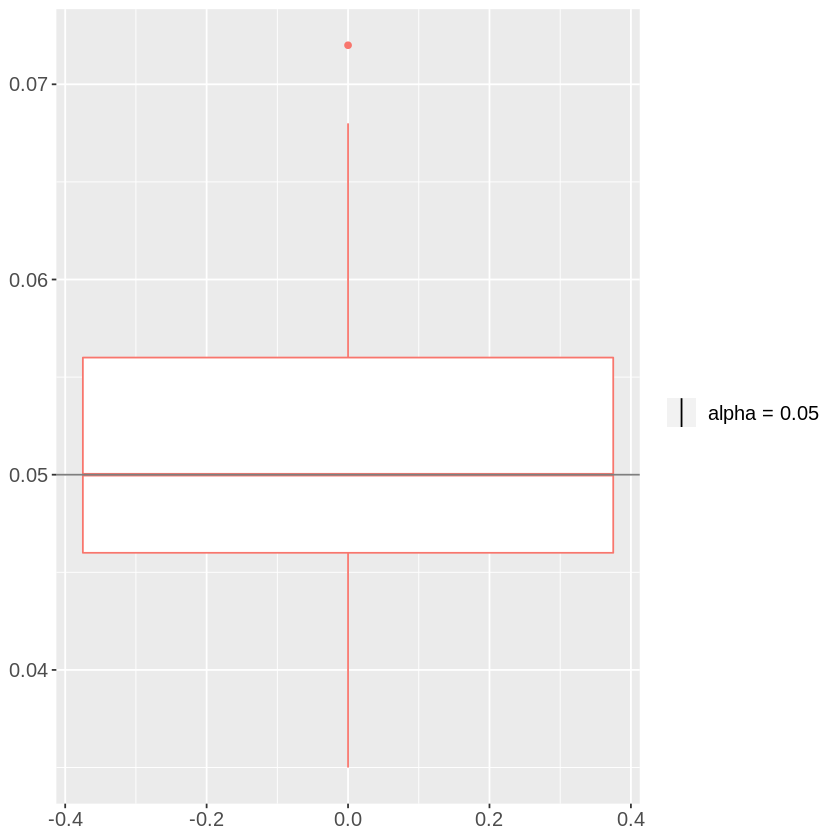

In [ ]:
ggplot(df, aes(x = df$a_vec)) +
  geom_boxplot(col='#f8766d') +
  labs(x=NULL) +
  coord_flip() +
  theme(text = element_text(size=15, family="Arial")) +
  theme(plot.title = element_text(hjust = 0.5))  +
  scale_x_continuous(breaks=seq(0,0.07,0.01)) +
  geom_vline(aes(color='black', , xintercept = 0.05)) +
  scale_color_manual(name = NULL, values = c("alpha = 0.05" = "black")) 